# KNN Classification


In [6]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils
from ucimlrepo import fetch_ucirepo
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer, matthews_corrcoef, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [7]:
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 
  

In [8]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
41804,2991,85,9,503,72,5124,233,225,124,5501,...,0,0,0,0,0,0,0,0,0,0
14445,3360,185,13,566,102,4468,222,249,158,2561,...,0,0,0,0,0,0,0,0,1,0
194721,3286,352,8,90,6,4097,206,226,158,1635,...,0,0,0,0,0,0,0,0,0,0
317944,2861,103,13,607,29,450,242,222,108,1170,...,0,0,0,0,0,0,0,0,1,0
166561,2834,97,9,108,13,1184,236,227,122,1832,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241604,2074,294,23,384,10,418,151,228,214,1025,...,0,0,0,0,0,0,0,0,0,1
407181,3120,281,11,182,0,1679,189,241,192,825,...,0,0,0,0,0,0,0,0,1,0
190419,3023,352,5,0,0,3129,211,231,158,361,...,0,0,0,0,0,0,0,0,0,0
60063,2858,248,5,30,0,3126,209,244,173,4052,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train, X_test, y_train, y_test)

In [19]:
mcc_scorer = make_scorer(matthews_corrcoef)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=34)
# todo: at least 5 folds, [5,10] are common

param_grid_knn = {"n_neighbors": [3, 5, 7, 11, 15], "weights": ["distance", "uniform"], "metric": ["minkowski", "euclidean"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring=mcc_scorer, cv=cv, verbose=3)
grid_knn.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.866 total time=  44.2s
[CV 2/2] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.866 total time=  44.8s
[CV 1/2] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.860 total time=  44.9s
[CV 2/2] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.859 total time=  45.1s
[CV 1/2] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.862 total time=  44.9s
[CV 2/2] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.862 total time=  46.0s
[CV 1/2] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.850 total time=  47.7s
[CV 2/2] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.849 total time=  47.1s
[CV 1/2] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.857 total time=  47.5s
[CV 2/2] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.857 to

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['minkowski', 'euclidean'], 'n_neighbors': [3, 5, ...], 'weights': ['distance', 'uniform']}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [20]:
best_knn = grid_knn.best_estimator_
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [21]:
y_pred = best_knn.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9365076633133396


Test MCC: 0.8980095874682505

Confusion Matrix:
[[39616  2521     5     0    38     9   179]
 [ 2274 53841   156     0   214   155    21]
 [    3   155  6564    56    15   358     0]
 [    0     0    90   427     0    32     0]
 [   41   300    16     0  1525    17     0]
 [    7   146   324    27     7  2962     0]
 [  177    34     0     0     1     0  3890]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.94      0.95      0.95     56661
           3       0.92      0.92      0.92      7151
           4       0.84      0.78      0.81       549
           5       0.85      0.80      0.82      1899
           6       0.84      0.85      0.85      3473
           7       0.95      0.95      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.88      0.89    116203
weighted avg       0.94      0.94      0.94    116203



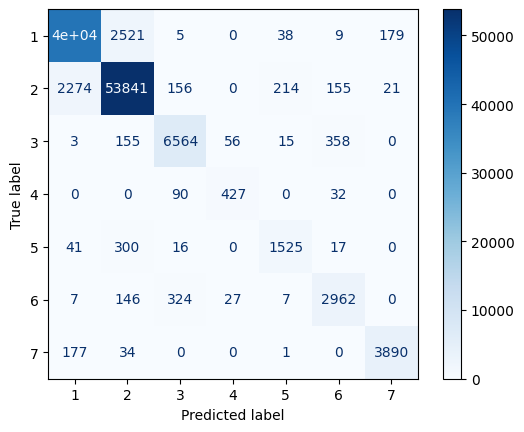

In [22]:
y_test_pred = grid_knn.predict(X_test_scaled)
test_mcc = matthews_corrcoef(y_test, y_test_pred)
print("Test MCC:", test_mcc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues")
plt.show()


In [23]:
dump(best_knn, "../data/best_knn.joblib")

['../data/best_knn.joblib']